## całki funkcji
1. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5D%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D
2. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5Dx%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D
3. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5DPower%5Bx%2C2%5D%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D
4. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5Dsin%5C%2840%29x%5C%2841%29%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D
5. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5DPower%5Be%2Cx%5D%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D
6. https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-Power%5Bx%2C2%5D%5DDivide%5B1%2C1%2BPower%5Bx%2C2%5D%5D%2C%7Bx%2C-%E2%88%9E%2C%E2%88%9E%7D%5D

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

# Lista funkcji i nazw
funkcje = {
    "1": {
        "f": lambda x: 1,
        "integral": np.sqrt(np.pi),
    },
    "x": {
        "f":lambda x: x,
        "integral": 0
    },
    "x^2": {
        "f": lambda x: x**2,
        "integral": np.sqrt(np.pi)/2
    },
    "sin(x)": {
        "f": lambda x: np.sin(x),
        "integral": 0
    },
    "exp(x)": {
        "f": lambda x: np.exp(x),
        "integral": np.sqrt(np.sqrt(np.e)) * np.sqrt(np.pi),
    },
    "1/(1+x^2)": {
        "f": lambda x: 1/(1+x**2),
        "integral": np.e * np.pi * math.erfc(1)
    },
}

# Parametry użytkownika
tolerancja_simpson = 1e-4
delta_simpson = 1.0

wezly_gauss = [2, 3, 4, 5]

In [2]:
def waga(x):
    return np.exp(-x**2)

def funkcja_wazona(f):
    return lambda x: f(x) * waga(x)

def gauss_hermite(f, n):
    wezly, wagi = np.polynomial.hermite.hermgauss(n)
    return np.sum(wagi * f(wezly))

def simpson(f, delta, tolerance, exact_value=None):
    wynik = 0.0
    a = 0.0
    errors = []
    def g(x):
        return f(x) * waga(x)
    # Positive direction
    while True:
        x = np.linspace(a, a + delta, 1000)
        y = g(x)
        part = scipy.integrate.simpson(y, x)
        if abs(part) < tolerance:
            break
        wynik += part
        if exact_value is not None:
            errors.append(abs(wynik - exact_value))
        a += delta
    # Negative direction
    a = 0.0
    while True:
        x = np.linspace(-a - delta, -a, 1000)
        y = g(x)
        part = scipy.integrate.simpson(y, x)
        if abs(part) < tolerance:
            break
        wynik += part
        if exact_value is not None:
            errors.append(abs(wynik - exact_value))
        a += delta
    return wynik, errors

In [3]:
errors = []
data = []

for nazwa, funkcja in funkcje.items():
    f = funkcja["f"]
    integral = funkcja["integral"]
    
    data.append({
        "Funkcja": nazwa,
        "Simpson": simpson(
            funkcja_wazona(f), delta_simpson, tolerancja_simpson
        )[0],
        "gauss n=2": gauss_hermite(f, 2),
        "gauss n=3": gauss_hermite(f, 3),
        "gauss n=4": gauss_hermite(f, 4),
        "gauss n=5": gauss_hermite(f, 5)
    })
    errors.append({
        "Funkcja": nazwa,
        "Simpson": abs(simpson(
            funkcja_wazona(f), delta_simpson, tolerancja_simpson
        )[0]) - integral,
        "gauss n=2": abs(gauss_hermite(f, 2) - integral),
        "gauss n=3": abs(gauss_hermite(f, 3) - integral),
        "gauss n=4": abs(gauss_hermite(f, 4) - integral),
        "gauss n=5": abs(gauss_hermite(f, 5) - integral)
    })

df = pd.DataFrame(data)
errors_df = pd.DataFrame(errors)
errors_df


,Funkcja,Simpson,gauss n=2,gauss n=3,gauss n=4,gauss n=5
0,1,-5.192191e-01,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00
1,x,2.846820e-13,0.000000e+00,0.000000e+00,2.775558e-17,2.081668e-17
2,x^2,-5.728984e-01,2.220446e-16,1.110223e-16,2.220446e-16,1.110223e-16
3,sin(x),3.738468e-13,0.000000e+00,0.000000e+00,0.000000e+00,1.040834e-17
4,exp(x),-8.556897e-01,4.153494e-02,2.074406e-03,7.411457e-05,2.060102e-06
5,1/(1+x^2),-2.870920e-01,1.616575e-01,7.466966e-02,3.727479e-02,2.013262e-02


In [4]:
errors_df.to_csv("errors.csv")

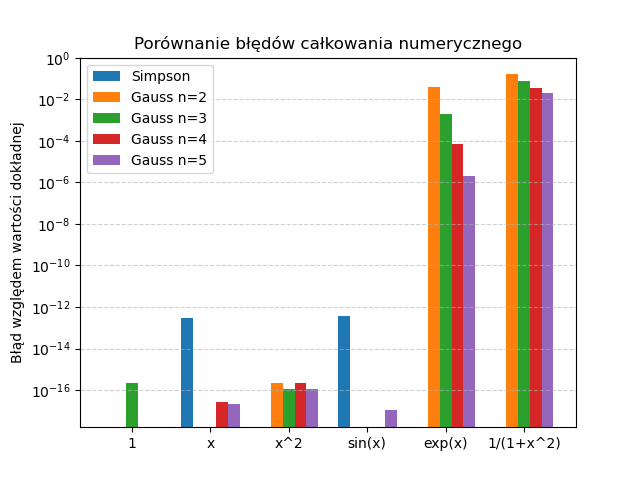

In [7]:
x = np.arange(len(errors_df["Funkcja"]))
width = 0.15

plt.figure()
plt.bar(x - 2*width, errors_df["Simpson"],   width, label="Simpson")
plt.bar(x - width,   errors_df["gauss n=2"], width, label="Gauss n=2")
plt.bar(x,           errors_df["gauss n=3"], width, label="Gauss n=3")
plt.bar(x + width,   errors_df["gauss n=4"], width, label="Gauss n=4")
plt.bar(x + 2*width, errors_df["gauss n=5"], width, label="Gauss n=5")

plt.ylabel("Błąd względem wartości dokładnej")
plt.title("Porównanie błędów całkowania numerycznego")
plt.xticks(x, errors_df["Funkcja"])
plt.yscale("log")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.show()

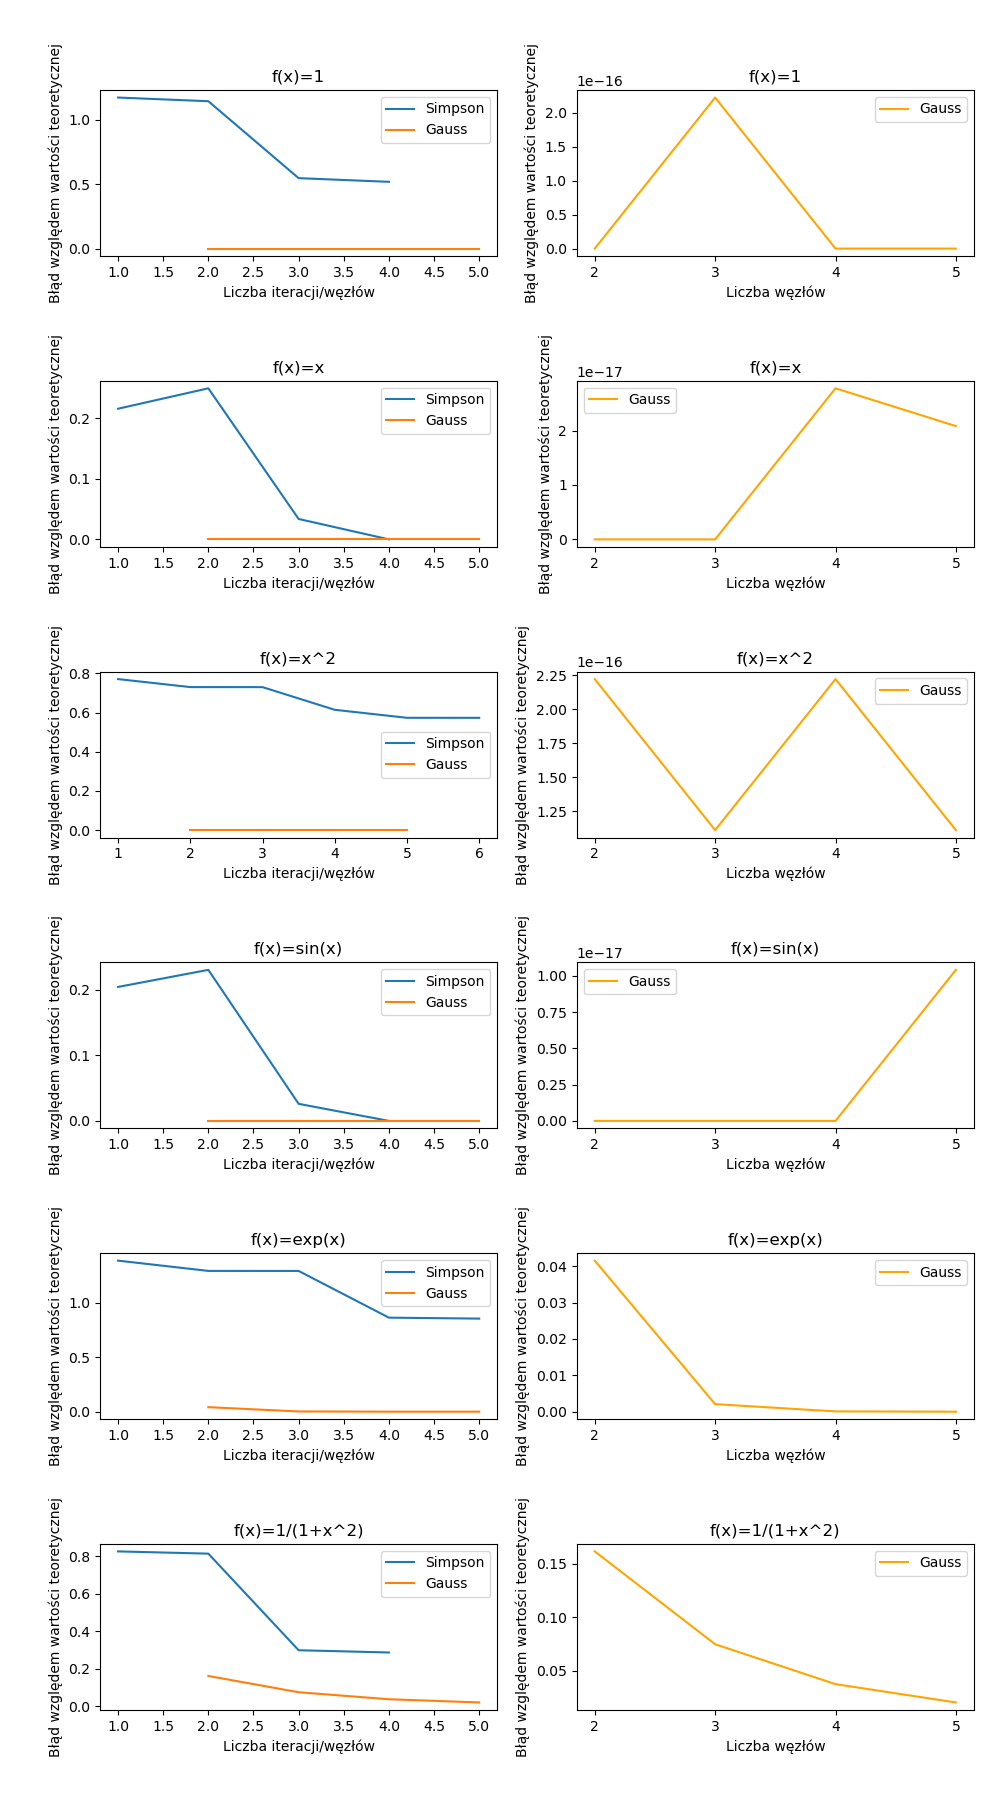

In [6]:
fig, axs = plt.subplots(len(funkcje), 2, figsize=(10,18))
fig.tight_layout()
fig.subplots_adjust(hspace=.75, left=0.1, wspace=0.2, top=0.95, bottom=0.05)

for i, (nazwa, funkcja) in enumerate(funkcje.items()):
    f = funkcja["f"]
    integral = funkcja["integral"]
    
    s = simpson(
        funkcja_wazona(f), 
        delta_simpson, 
        tolerancja_simpson, 
        integral
    )
    errors = len(s[1])
    x = list(range(1, errors+1))
    gh = []
    for n in wezly_gauss:
        gh.append(abs(gauss_hermite(f, n)-integral))
    axs[i,0].set_title(f"f(x)={nazwa}")
    axs[i,0].plot(x,s[1], label="Simpson")
    axs[i,0].plot(wezly_gauss,gh, label="Gauss")
    axs[i,0].set_xlabel("Liczba iteracji/węzłów")
    axs[i,0].set_ylabel("Błąd względem wartości teoretycznej")
    axs[i,0].legend()

    axs[i,1].set_title(f"f(x)={nazwa}")
    axs[i,1].plot(wezly_gauss,gh, label="Gauss", color="orange")
    axs[i,1].set_xlabel("Liczba węzłów")
    axs[i,1].set_ylabel("Błąd względem wartości teoretycznej")
    axs[i,1].legend()
    axs[i,1].set_xticks(wezly_gauss)